### Very unefficient, the last two cells here have an efficient version inspired from my internship

In [1]:
import os
import numpy as np
import pandas as pd
from Bio.PDB import PDBParser
import matplotlib.pyplot as plt
import numpy as np
from Bio import PDB
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks

In [ ]:
def read_pdb_coord(input_pdb):
    """
    This function uses biopython package for consistency
    function that reads a pdb file and outputs the xyz coordinates of the atoms in it
    output is a tuple of this form : (x, y,bz) where each coord is a list with all the coordinates
    """
    x_coord = []
    y_coord = []
    z_coord = []

    parser = PDB.PDBParser(QUIET=True)
    io = PDB.PDBIO()
    struct = parser.get_structure('easter_egg', input_pdb)

    for model in struct:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    x,y,z = atom.get_coord()
                    
                    # Append the coordinates to the lists
                    x_coord.append(x)
                    y_coord.append(y)
                    z_coord.append(z)
    return (x_coord, y_coord, z_coord)


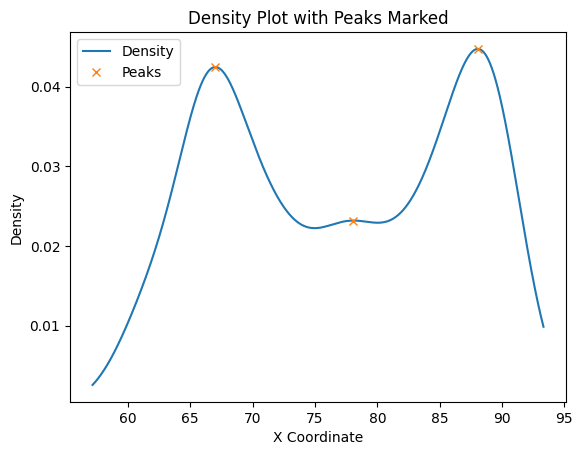

Peaks are located at: [67.01063732 78.08697828 88.07740346]
Distance between peaks: 21.066766137475355
Middle point: 77.5440203921573


In [ ]:
x, y, z = read_pdb_coord("/home/deider/memoire/experiences/project_ppm/thomas_barrel_ppm.pdb") # Change this to your ppm output PDB file path

# Compute KDE using scipy's gaussian_kde
kde = gaussian_kde(z)
x_values = np.linspace(min(z), max(z), 1000)  # Define x range for KDE plot
density_values = kde(x_values)  # Evaluate the KDE on the x range

# Use find_peaks to identify the peaks in the density values
peaks, _ = find_peaks(density_values)

# Plot the KDE with peaks marked
plt.plot(x_values, density_values, label='Density')
plt.plot(x_values[peaks], density_values[peaks], "x", label='Peaks')  # mark the peaks
plt.xlabel("X Coordinate")
plt.ylabel("Density")
plt.legend()
plt.title("Density Plot with Peaks Marked")
plt.show()

# Output the peak locations for reference
peak_locations = x_values[peaks]
print("Peaks are located at:", peak_locations)
print("Distance between peaks:", peak_locations[-1]-peak_locations[0])
print("Middle point:", (peak_locations[-1] + peak_locations[0])/2)

In [4]:
def remove_heteroatoms(input_pdb, output_pdb):
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure("protein", input_pdb)
    
    io = PDB.PDBIO()
    io.set_structure(structure)
    
    class NoHETATMSelect(PDB.Select):
        def accept_atom(self, atom):
            return atom.get_parent().id[0] == " "
    
    io.save(output_pdb, select=NoHETATMSelect())
    print(f"New PDB file saved without heteroatoms: {output_pdb}")



In [ ]:
# Example Usage:
input_pdb = "thomas_barrel_ppm.pdb"
output_pdb = "thomas_barrel_cleaned.pdb"
remove_heteroatoms(input_pdb, output_pdb)

New PDB file saved without heteroatoms: thomas_barrel_cleaned.pdb


wtf I realised that this code is SUPER sub optimal here is a optimal one : (comes from my internship)

In [ ]:
from Bio.PDB import PDBParser, PDBIO, Select

class NonHeteroAtomFilter(Select):
    def accept_atom(self, atom):
        return not atom.get_parent().id[0].strip()

def filter_out_heteroatoms(input_pdb, output_pdb):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('model', input_pdb)

    io = PDBIO()
    io.set_structure(structure)
    io.save(output_pdb, select=NonHeteroAtomFilter())

    print(f"Filtered PDB saved to: {output_pdb}")


In [2]:
filter_out_heteroatoms("thomas_barrel_cleaned.pdb", "thomas_barrel_final.pdb")

Filtered PDB saved to: thomas_barrel_final.pdb


In [3]:
from Bio.PDB import PDBParser, PDBIO, Select

class HeteroAtomFilter(Select):
    def accept_atom(self, atom):
        # Only accept atoms where the parent residue's id starts with "H_" or is not " " (blank)
        return bool(atom.get_parent().id[0].strip())

def filter_out_barrel(input_pdb, output_pdb):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('model', input_pdb)

    io = PDBIO()
    io.set_structure(structure)
    io.save(output_pdb, select=HeteroAtomFilter())

    print(f"Filtered PDB (only heteroatoms) saved to: {output_pdb}")


filter_out_barrel("thomas_barrel_ppm.pdb", "ppm_without_barrel.pdb")


Filtered PDB (only heteroatoms) saved to: ppm_without_barrel.pdb


/home/deider/miniconda3/lib/python3.12/site-packages/Bio/PDB/PDBIO.py:215: BiopythonWarning: Missing occupancy in atom ('model', 0, 'x', ('H_DUM', 2, ' '), ('N', ' ')) written as blank
  warnings.warn(
/home/deider/miniconda3/lib/python3.12/site-packages/Bio/PDB/PDBIO.py:215: BiopythonWarning: Missing occupancy in atom ('model', 0, 'x', ('H_DUM', 3, ' '), ('O', ' ')) written as blank
  warnings.warn(
/home/deider/miniconda3/lib/python3.12/site-packages/Bio/PDB/PDBIO.py:215: BiopythonWarning: Missing occupancy in atom ('model', 0, 'x', ('H_DUM', 4, ' '), ('N', ' ')) written as blank
  warnings.warn(
/home/deider/miniconda3/lib/python3.12/site-packages/Bio/PDB/PDBIO.py:215: BiopythonWarning: Missing occupancy in atom ('model', 0, 'x', ('H_DUM', 5, ' '), ('O', ' ')) written as blank
  warnings.warn(
/home/deider/miniconda3/lib/python3.12/site-packages/Bio/PDB/PDBIO.py:215: BiopythonWarning: Missing occupancy in atom ('model', 0, 'x', ('H_DUM', 6, ' '), ('N', ' ')) written as blank
  warni